**Crank–Nicolson PDE Method for Barrier Options**

This notebook numerically solves the option pricing PDE for an up-and-out European call using the Crank–Nicolson finite-difference method.
The scheme is unconditionally stable and second-order accurate, providing a benchmark against analytical solutions. Crank–Nicolson is widely used for barrier and other path-dependent options.

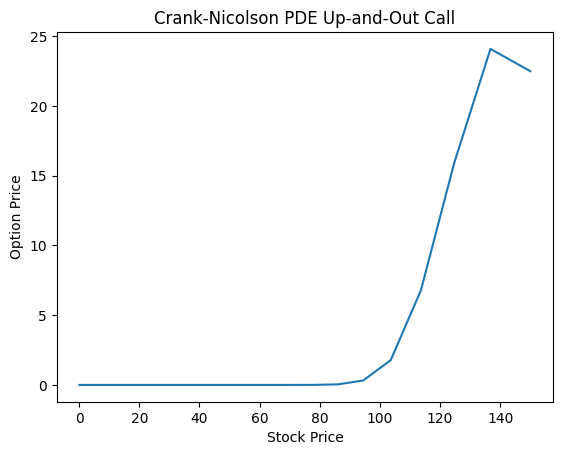

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Crank-Nicolson PDE Method
# --------------------------
# Solve the up-and-out European call PDE numerically
# using Crank-Nicolson finite-difference method.

def crank_nicolson_up_and_out_call(S, K, r, sigma, T, B, M, N):
    LL = 0.1  # lower log-stock boundary
    dt = sigma**2 * T / (2*N)
    ds = (np.log(B/K) - np.log(LL/K))/M
    a = dt / (2*ds**2)
    l = 2*r/sigma**2

    x = np.linspace(np.log(LL/K), np.log(B/K), M)
    u = np.zeros((N,M))
    u[0,:] = np.maximum(np.exp((l+1)*x/2) - np.exp((l-1)*x/2), 0)

    # Crank-Nicolson matrices
    C = np.diag(2*(1+a)*np.ones(M)) + np.diag(-a*np.ones(M-1),1) + np.diag(-a*np.ones(M-1),-1)
    D = np.diag(2*(1-a)*np.ones(M)) + np.diag(a*np.ones(M-1),1) + np.diag(a*np.ones(M-1),-1)
    c_inv = np.linalg.inv(C)

    # Time-stepping loop
    for j in range(N-1):
        RHS = np.dot(D, u[j,:])
        u[j+1,:] = np.dot(c_inv, RHS)

    tau = sigma**2 * T / 2
    f = K*np.exp(((1-l)/2)*x - ((1+l)**2)/4*tau)*u[-1,:]
    return f, K*np.exp(x)

# Example usage
S0 = 100
K = 110
r = 0.05
sigma = 0.1
T = 1
B = 150
M = 80
N = 400

option_price, stocks = crank_nicolson_up_and_out_call(S0,K,r,sigma,T,B,M,N)

plt.plot(stocks, option_price)
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('Crank-Nicolson PDE Up-and-Out Call')
plt.show()
